In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections
%matplotlib inline

    
import matplotlib as mpl
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from functions.odeint import odeint
from functions.logProcess import logProcess


FIGURES_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/figures/'
SUP_FIG_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/sup_figures/'

mpl.rcParams['axes.linewidth'] = 2

# TWO POPULATION MODEL

We model the dynamics of the populations of wedge and ring neurons with rate-based models described by the following differential equations:

\begin{equation}\label{eq_two_population_firing_rates_methods}
\begin{cases}
    \tau \dot{r}_E(t) = -r_E(t) + \Big[w_{EE}(t) r_E(t) - w_{EI}r_I(t) + \theta \Big]_+ \\
    \tau \dot{r}_I(t) = -r_I(t) + \Big[w_{IE}(t) r_E(t) \Big]_{+}. \\
\end{cases}
\end{equation}

Here,  $\tau$ is the neural time constant, and  $[\cdot]_{+}$ is the neural input-output function. 

Switching between sleep and wake phases is dependent on the firing rate of ring neurons. We filter ring neuron activity activity with a low-pass filter using the following differential equation:

\begin{equation}\label{low_pass_filter}
    \tau_f  \dot{r}_I^{(f)}(t) = -r_I^{(f)}(t) + r_I(t),
\end{equation}

where $\tau_f$ is the time constant of the filter.



For rate-based models, a general Hebbian plasticity rule for a synaptic weight $w_{ij}$ can be defined as follows:

\begin{equation}
\tau_{ij}\dot{w}_{ij} = F(w_{ij}, r_i, r_j),
\end{equation}

where $\tau_{ij}$ is the time constant of the rule, and $F(\cdot)$ is a function that depends on the synaptic weight, $w_{ij}$, and on pre- and postsynaptic activities, $r_j$ and $r_i$, respectively \cite{gerstner2002mathematical}. The function $F(\cdot)$ needs to fulfill Hebb’s condition: to produce a change in the synaptic weight $w_{ij}$, the pre- and postsynaptic neurons must be active:  $r_i > 0$, $r_j > 0$. This function is expanded in a Taylor series \cite{gerstner2002mathematical} around zero, i.e. $r_I = r_E = 0$:

\begin{equation}
\tau_{ij}\dot{w}_{ij} \approx c_{00} + c_{10}r_i + c_{11}r_j + c_{20}r_i^2 + c_{21}r_i r_j + c_{22}r_j^2 + c_{30}r_i^3 + c_{31}r_i^2r_j + c_{32}r_i r_j^2 + c_{33}r_j^3 + O(r^4),
\end{equation}

where each coefficient depends on the strength connection $c_{mn} = c_{mn}(w_{ij})$. 

The plasticity rule in $w_{EE}(t)$ during the wake phase is obtained by setting $c_{21} = 1$ and all the other coefficients to zero, while the plasticity rule in $w_{IE}$ is obtained by setting $c_{21} = - r_0$, $c_{32} = 1$ and the other coefficients to zero, leading to the following Hebbian plasticity rules:

\begin{equation}\label{eq_two_population_plasticity_rules_wake_methods}
\begin{cases}
    \tau_{EE} \dot{w}_{EE}(t) = r_E(t) r_E(t)\\
    \tau_{IE} \dot{w}_{IE}(t) = r_I(t)r_E(t)\Big(r_{E}(t) - r_0 \Big). \\
\end{cases}
\end{equation}

During sleep, we can obtain the changed sign of the plasticity rule in $w_{EE}$ by setting $c_{21} = -1$ and all the other coefficients to zero:

\begin{equation}\label{eq_two_population_plasticity_rules_sleep_methods}
\begin{cases}
    \tau_{EE} \dot{w}_{EE}(t) = -r_E(t) r_E(t)\\
    \tau_{IE} \dot{w}_{IE}(t) = r_I(t)r_E(t)\Big(r_{E}(t) - r_0 \Big). \\
\end{cases}
\end{equation}

To ensure that synapses remain excitatory or inhibitory throughout the system's dynamics, the plasticity rules are threshold-rectified at zero if the synaptic weights are zero:

\begin{equation}
    \begin{cases}
    \dot{w}_{EE}(t) = 0 \quad\quad \text{if} \quad w_{EE}(t) = 0 \\
    \dot{w}_{IE}(t) = 0 \quad\quad \text{if} \quad w_{IE}(t) = 0.
    \end{cases}
\end{equation}
 \begin{equation}
     \begin{cases}
     \dot{w}_{EE}(t) = \Big[\dot{w}_{EE}(t)\Big]_+ \quad\quad \text{if} \quad w_{EE}(t) \leq 0 \\
     \dot{w}_{IE}(t) = \Big[\dot{w}_{IE}(t)\Big]_+ \quad\quad \text{if} \quad w_{IE}(t) \leq 0.
     \end{cases}
 \end{equation}


The parameters for the two-population model are shown in Table S1 (manuscript document). We simulated the model with forward Euler with a time step of $dt = 0.0001$ sec.




To analyze this model, we assume that the dynamics of the synaptic plasticity in equations (\ref{eq_two_population_plasticity_rules_wake_methods}) and (\ref{eq_two_population_plasticity_rules_sleep_methods}) are much slower than the dynamics of the neural populations in equations (\ref{eq_two_population_firing_rates_methods}):

In the case where $\tau_{EE}, \tau_{IE}$ are infinitely larger than $\tau$, we can write that:
\begin{equation}
    \frac{\tau}{\tau_{EE}} \longrightarrow 0 \quad \text{and} \quad \frac{\tau}{\tau_{IE}} \longrightarrow 0.
\end{equation}

Below, we discuss the stability and global behavior of the two population model in two different limits. First, the fast-timescale limit where $\tau_{EE}, \tau_{IE} \longrightarrow \infty$ and the evolution of the model therefore only depends on the dynamics of the neural populations. Secondly, the slow-timescale limit where  $\tau \longrightarrow 0$ and therefore the dynamics of the plasticity rules are governing the evolution of the model. 
We then can study the stability in this two different regimens and extract the global behavior of the model.


## Fast-timescale limit

Assuming $\tau_{EE}, \tau_{IE} \longrightarrow \infty$ means that synaptic plasticity is sufficiently slow compared to the dynamics of the neural populations so that it can be assumed to be constant. This idea offers the advantage of treating the synaptic weight  $w_{EE}$ as a free parameter with a fixed value, assuming that $w_{IE}$ has already evolved through its plasticity rule to its equilibrium value where $r_E \longrightarrow r_0$. Therefore, for a given value of $w_{EE}$, we set the value of $w_{EI}$ such that the fixed point for the wedge neurons is $r_0$. The stability of the 2-dimensional system given by equations in (1) (previous section) is then analyzed with respect to the value of $w_{EE}$. Since the system is piecewise linear due to the threshold function $[\cdot]_+$, we perform a linear analysis assuming that the inputs to the neurons are positive. Under these conditions, the fixed point of the system, $(r_{E}^{*}, r_{I}^{*})$, is given by the following expressions:

\begin{equation}
\begin{cases}
    r_E^{*} = w_{EE}r_{E}^{*} - w_{EI}r_{I}^{*} + \theta = r_0\\
    r_I^{*} = w_{IE}r_0
\end{cases}
\end{equation}

Since we force the fixed point of wedge neurons to be $r_0$, we can extract the equilibrium value of $w_{IE}$ as a function of $w_{EE}$:

\begin{equation}\label{eq:w_EI_respect2_w_EE}
    w_{IE} = \frac{\theta}{w_{EI}r_0} + \frac{w_{EE} - 1}{w_{EI}}
\end{equation}

Since we force the synaptic weights to be positive, and taking into account the parameter values that in Table S1 (manuscript document), we find that $w_{EE} \geq 1$ for $w_{IE}$ is positive. The fixed point of the system can be described with respect to $w_{EE}$ as:

\begin{equation}\label{eq:fast-timescales_fixed_point}
\begin{cases}
    r_E^{*} = r_0 \\
    r_I^{*} = \frac{\theta}{w_{EI}} + r_0\frac{w_{EE} - 1}{w_{EI}}
\end{cases}
\end{equation}



Both the fixed point of ring neuron activity, $r_I^{*}$, and the equilibrium value of the connectivity, $w_{IE}$, depend linearly on $w_{EE}$, implying that if $w_{EE}$ increases, both $w_{IE}$ and $r_I^{*}$ increase as well as long as the fixed point is stable. We analyze the stability of the system by calculating the eigenvalues:




\begin{equation*}
J = \begin{vmatrix}
\frac{\partial \dot{r}_E}{\partial r_E}\Big)_{\mathbf{x}^*} & \frac{\partial \dot{r}_E}{\partial r_I}\Big)_{\mathbf{x}^*} \\
\frac{\partial \dot{r}_I}{\partial r_E}\Big)_{\mathbf{x}^*} & \frac{\partial \dot{r}_I}{\partial r_I}\Big)_{\mathbf{x}^*} \\
\end{vmatrix}  = \begin{vmatrix}
\frac{(w_{EE} - 1)}{\tau} & - \frac{w_{EI}}{\tau} \\
\frac{w_{IE}}{\tau} &  -\frac{1}{\tau} \\
\end{vmatrix} =  \begin{vmatrix}
\frac{(w_{EE} - 1)}{\tau} & - \frac{w_{EI}}{\tau} \\
\frac{1}{w_{EI}\tau}\Big( \frac{\theta}{r_0} + w_{EE} - 1 \Big) &  -\frac{1}{\tau} \\
\end{vmatrix}
\end{equation*}


\begin{equation}
\lambda_{\pm} = \frac{1}{2\tau}\Bigg(  (w_{EE} - 2) \pm \sqrt{ (w_{EE} - 2)^2 - \frac{4\theta}{r_0}  }  \Bigg).
\end{equation}


Both eigenvalues are shown in the following figure with respect to different values of $w_{EE}$. This leads to four different cases:

\begin{equation}
\begin{cases}
    (1)\quad w_{EE} \in \Big[1,\quad 2-2\sqrt{\theta/r_0}\Big] \quad \\
    (2)\quad w_{EE} \in \Big( 2-2\sqrt{\theta/r_0}, \quad 2 \Big ] \\
    (3)\quad w_{EE} \in \Big( 2, \quad 2+2\sqrt{\theta/r_0} \Big] \\
    (4)\quad w_{EE} > 2+2\sqrt{\theta/r_0} \\
\end{cases}
\end{equation}
In case (1), both eigenvalues are real and negative: The fixed point is stable (equation (\ref{eq:fast-timescales_fixed_point})). In case (2), the real part of the eigenvalues is negative and the imaginary part is non-zero: The system evolves towards the fixed point with damped oscillations. In case (3), the real part of the eigenvalues is positive and the imaginary part is non-zero: The system diverges towards infinity, oscillating with amplitudes which increase exponentially. In case (4), the eigenvalues are real and positive: The fixed point is unstable. This analysis predicts a bifurcation in the stability of the fixed point when $w_{EE} = 2$. This behavior is summarized in figure \js{figure reference}. 


The non-linearity of the linear threshold function changes the behavior of the model slightly. While the behavior stays the same for the cases (1), (2) and (4), because the model is mostly in the linear regime, case (3) differs and the non-linearity produces stable cycles around the fixed point. This behavior is found empirically from simulating the non-linear model.


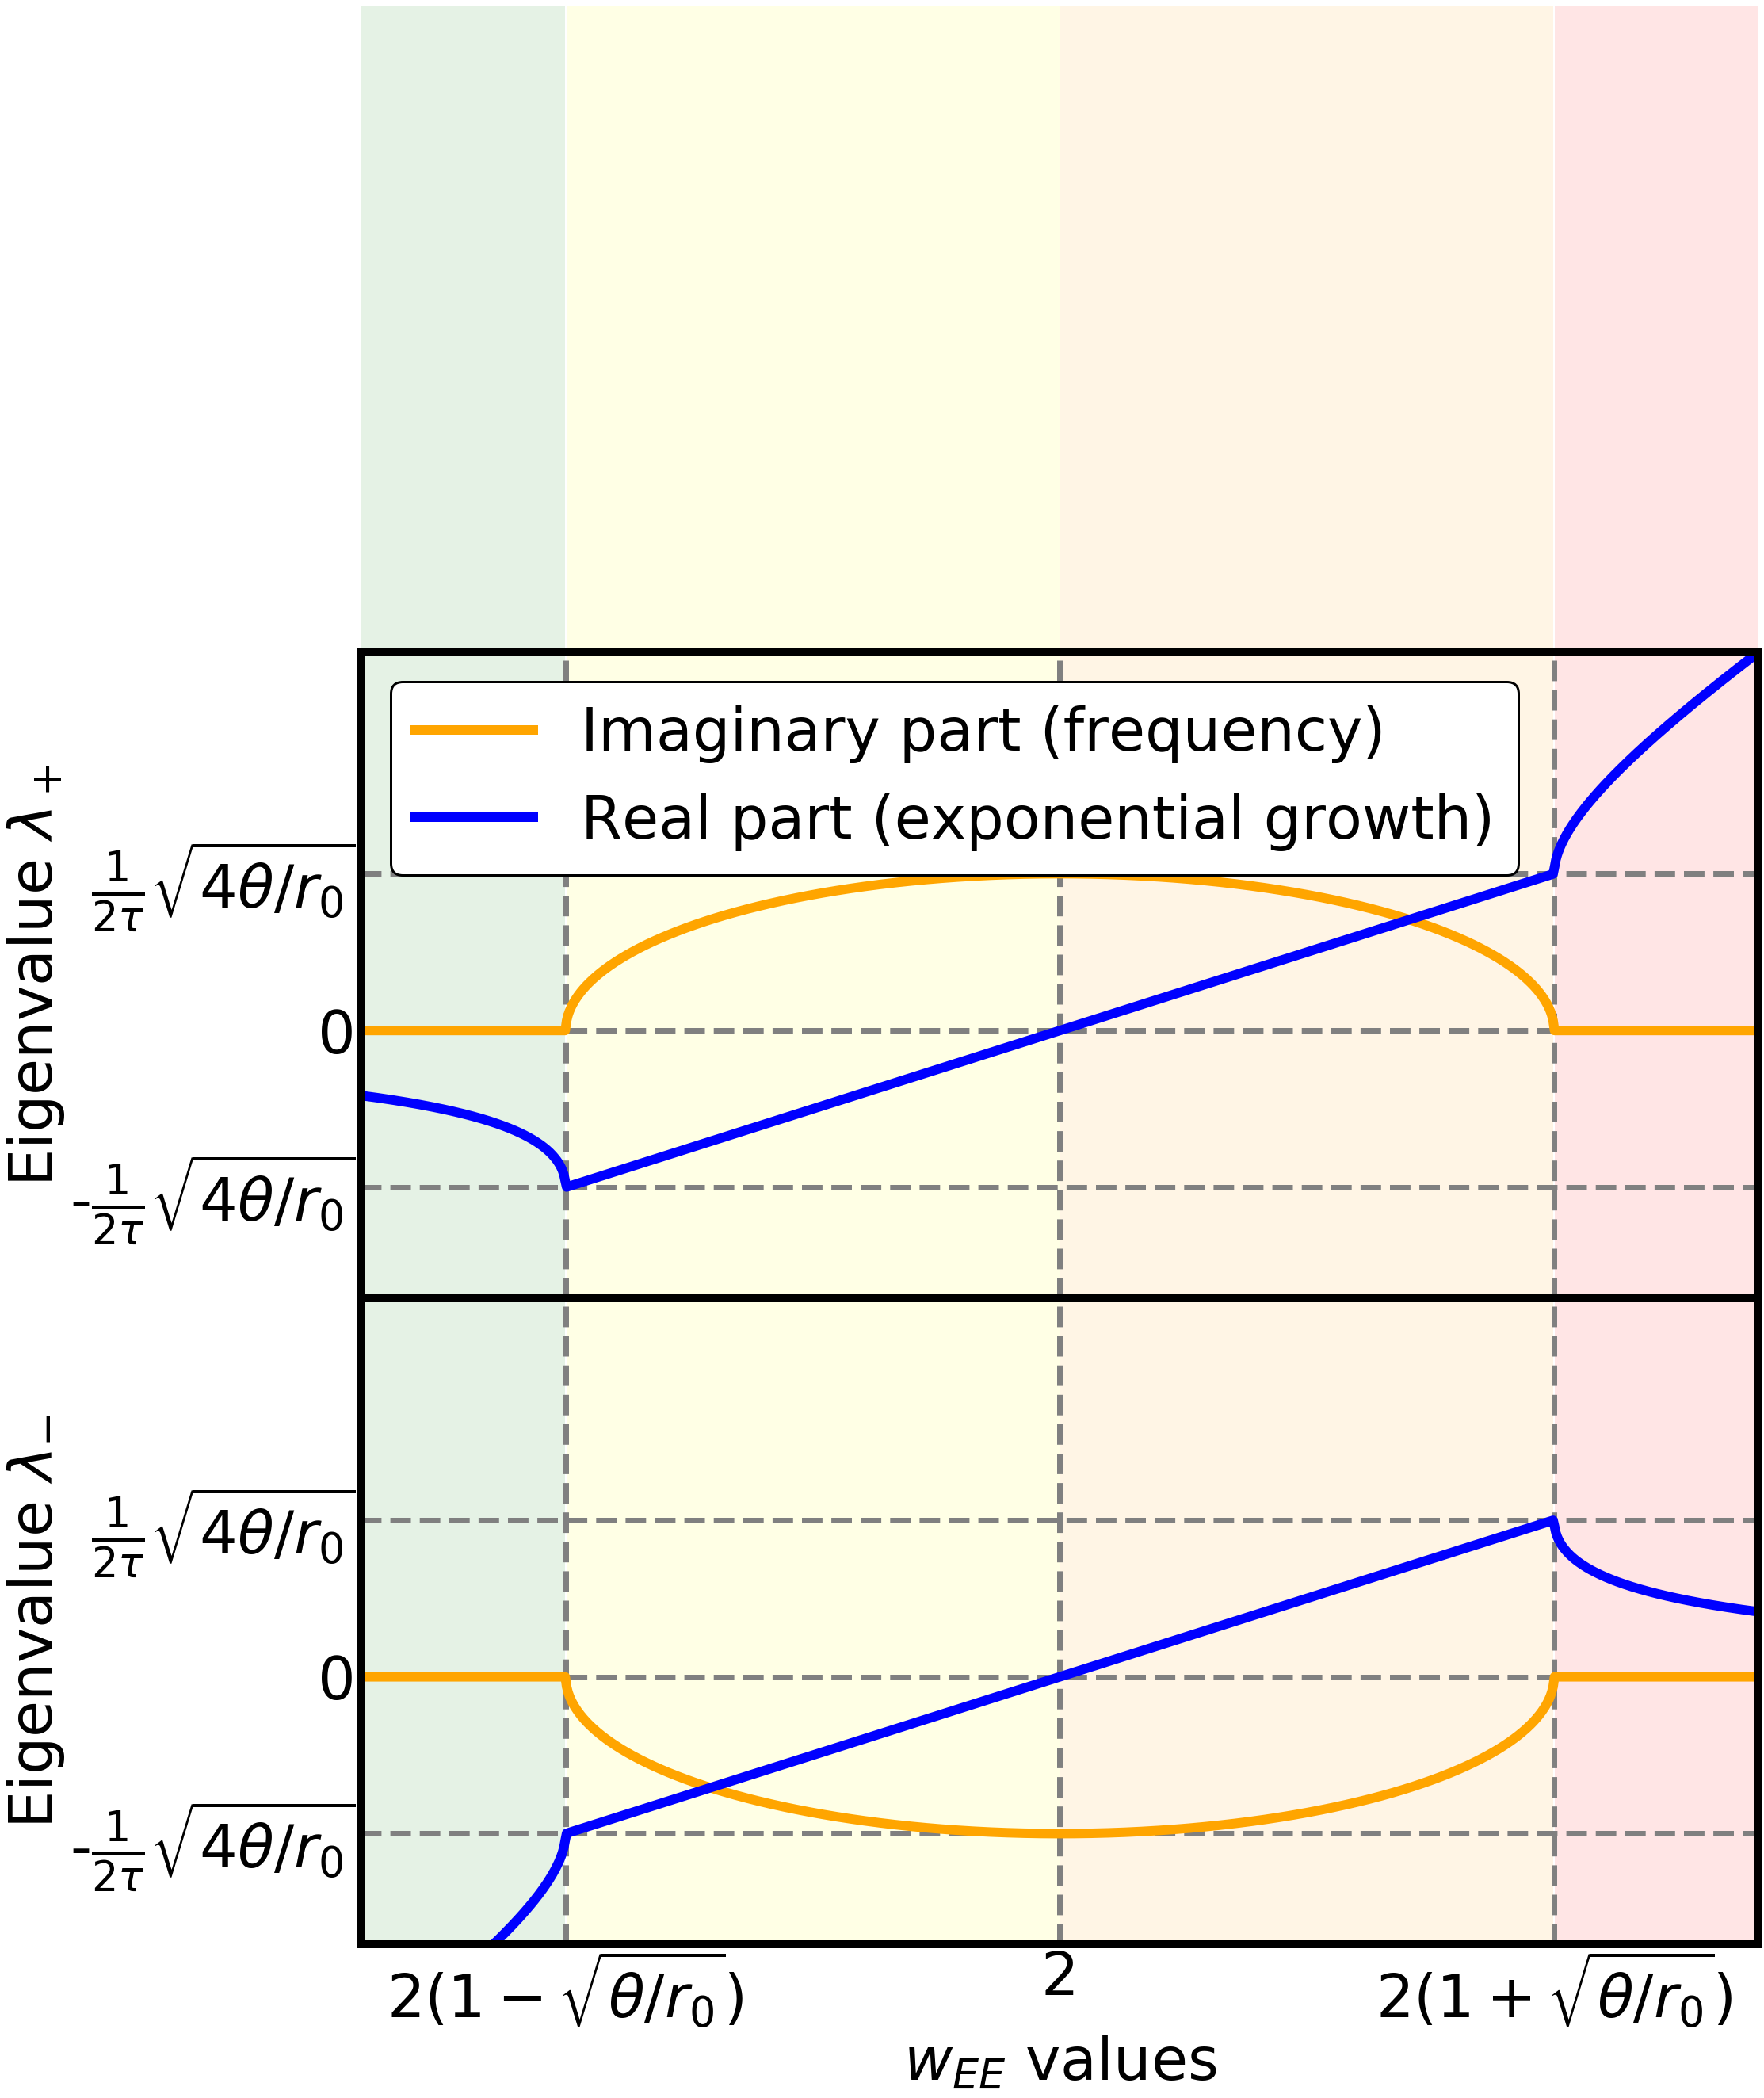

In [3]:
from numpy.lib.scimath import sqrt as csqrt


r0     = 10
theta  = 5
wEI    = 0.5

wEE = np.linspace(0,4,1000)

lambda1 = (wEE-2) + csqrt(np.power(wEE-2, 2) - 4*float(theta)/float(r0) )
lambda2 = (wEE-2) - csqrt(np.power(wEE-2, 2) - 4*float(theta)/float(r0) )


fsize = 75

plt.rcParams.update({'font.size': fsize})
plt.rcParams['axes.linewidth'] = 10

fig, axes = plt.subplots(3,1,figsize=(35,45))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(left=0.2)



fig.subplots_adjust(hspace=0)


axes[0].set_xticks([])
axes[0].set_ylim([0,1])
axes[0].axis("off")



axes[1].plot(wEE, np.imag(lambda1), label = 'Imaginary part (frequency)', color = "orange", linewidth = 12)
axes[1].plot(wEE, np.real(lambda1), label = 'Real part (exponential growth)', color = "blue", linewidth = 12)
l = axes[1].legend()
l.get_frame().set_linewidth(3)
l.get_frame().set_edgecolor("black")
l.get_frame().set_alpha(1)


axes[1].set_ylim([-np.sqrt(4*float(theta)/r0)-1, np.max(np.real(lambda1))])
axes[1].grid(linestyle = 'dashed', color='grey', linewidth = 7)
plt.sca(axes[1])
plt.xticks([2*(1 - np.sqrt(float(theta)/float(r0))), 2, 2*(1 + np.sqrt(float(theta)/float(r0)))], 
           [r'$2 - 2\sqrt{\theta/r_0}$', '2' , r'$2 + 2\sqrt{\theta/r_0})$'])
plt.yticks([-np.sqrt(4*float(theta)/r0), 0, np.sqrt(4*float(theta)/r0)], 
           [r'-$\frac{1}{2\tau}\sqrt{4\theta/r_0}$', '0', r'$\frac{1}{2\tau}\sqrt{4\theta/r_0}$' ])
axes[1].set_ylabel(r'Eigenvalue $\lambda_+$')





axes[2].plot(wEE, np.imag(lambda2), label = 'imaginary part (frequency)', color = "orange", linewidth = 12)
axes[2].plot(wEE, np.real(lambda2), label = 'real part (exponential growth)', color = "blue", linewidth = 12)
axes[2].set_ylim([-np.sqrt(4*float(theta)/r0)-1, np.max(np.real(lambda1))])
axes[2].grid(linestyle = 'dashed', color='grey', linewidth = 7)
axes[2].set_xlabel(r'$w_{EE}$ values')
axes[2].set_ylabel(r'Eigenvalue $\lambda_{-}$')

plt.sca(axes[2])
plt.xticks([2*(1 - np.sqrt(float(theta)/float(r0))), 2, 2*(1 + np.sqrt(float(theta)/float(r0)))], 
           [r'$2(1 - \sqrt{\theta/r_0})$', '2' , r'$2(1 + \sqrt{\theta/r_0})$'])
plt.yticks([-np.sqrt(4*float(theta)/r0), 0, np.sqrt(4*float(theta)/r0)], 
           [r'-$\frac{1}{2\tau}\sqrt{4\theta/r_0}$', '0', r'$\frac{1}{2\tau}\sqrt{4\theta/r_0}$' ])


for i in range(3):
    axes[i].set_xlim(wEE[0], wEE[-1])
    axes[i].fill_between(wEE, -np.sqrt(4*float(theta)/r0)-1, np.max(np.real(lambda1)),
                         where=wEE <= 2*(1 - np.sqrt(float(theta)/float(r0))),
                         facecolor='green', alpha=0.1)

    axes[i].fill_between(wEE, -np.sqrt(4*float(theta)/r0)-1, np.max(np.real(lambda1)),
                         where= np.logical_and( wEE >= 2*(1 - np.sqrt(float(theta)/float(r0))), wEE <= 2) ,
                         facecolor='yellow', alpha=0.1)
    
    axes[i].fill_between(wEE, -np.sqrt(4*float(theta)/r0)-1, np.max(np.real(lambda1)),
                     where= np.logical_and( wEE <= 2*(1 + np.sqrt(float(theta)/float(r0))), wEE >= 2) ,
                     facecolor='orange', alpha=0.1)
    
    axes[i].fill_between(wEE, -np.sqrt(4*float(theta)/r0)-1, np.max(np.real(lambda1)),
                 where= wEE >= 2*(1 + np.sqrt(float(theta)/float(r0))),
                 facecolor='red', alpha=0.1)
    
    
    
#FIG2_DIR = '/home/andres/Dropbox (Stiftung Caesar)/sleep_and_navigation_paper/figures/Two_population_model_simulation/'
plt.savefig(SUP_FIG_DIR + 'sup_fig2/eigenvalues.png')

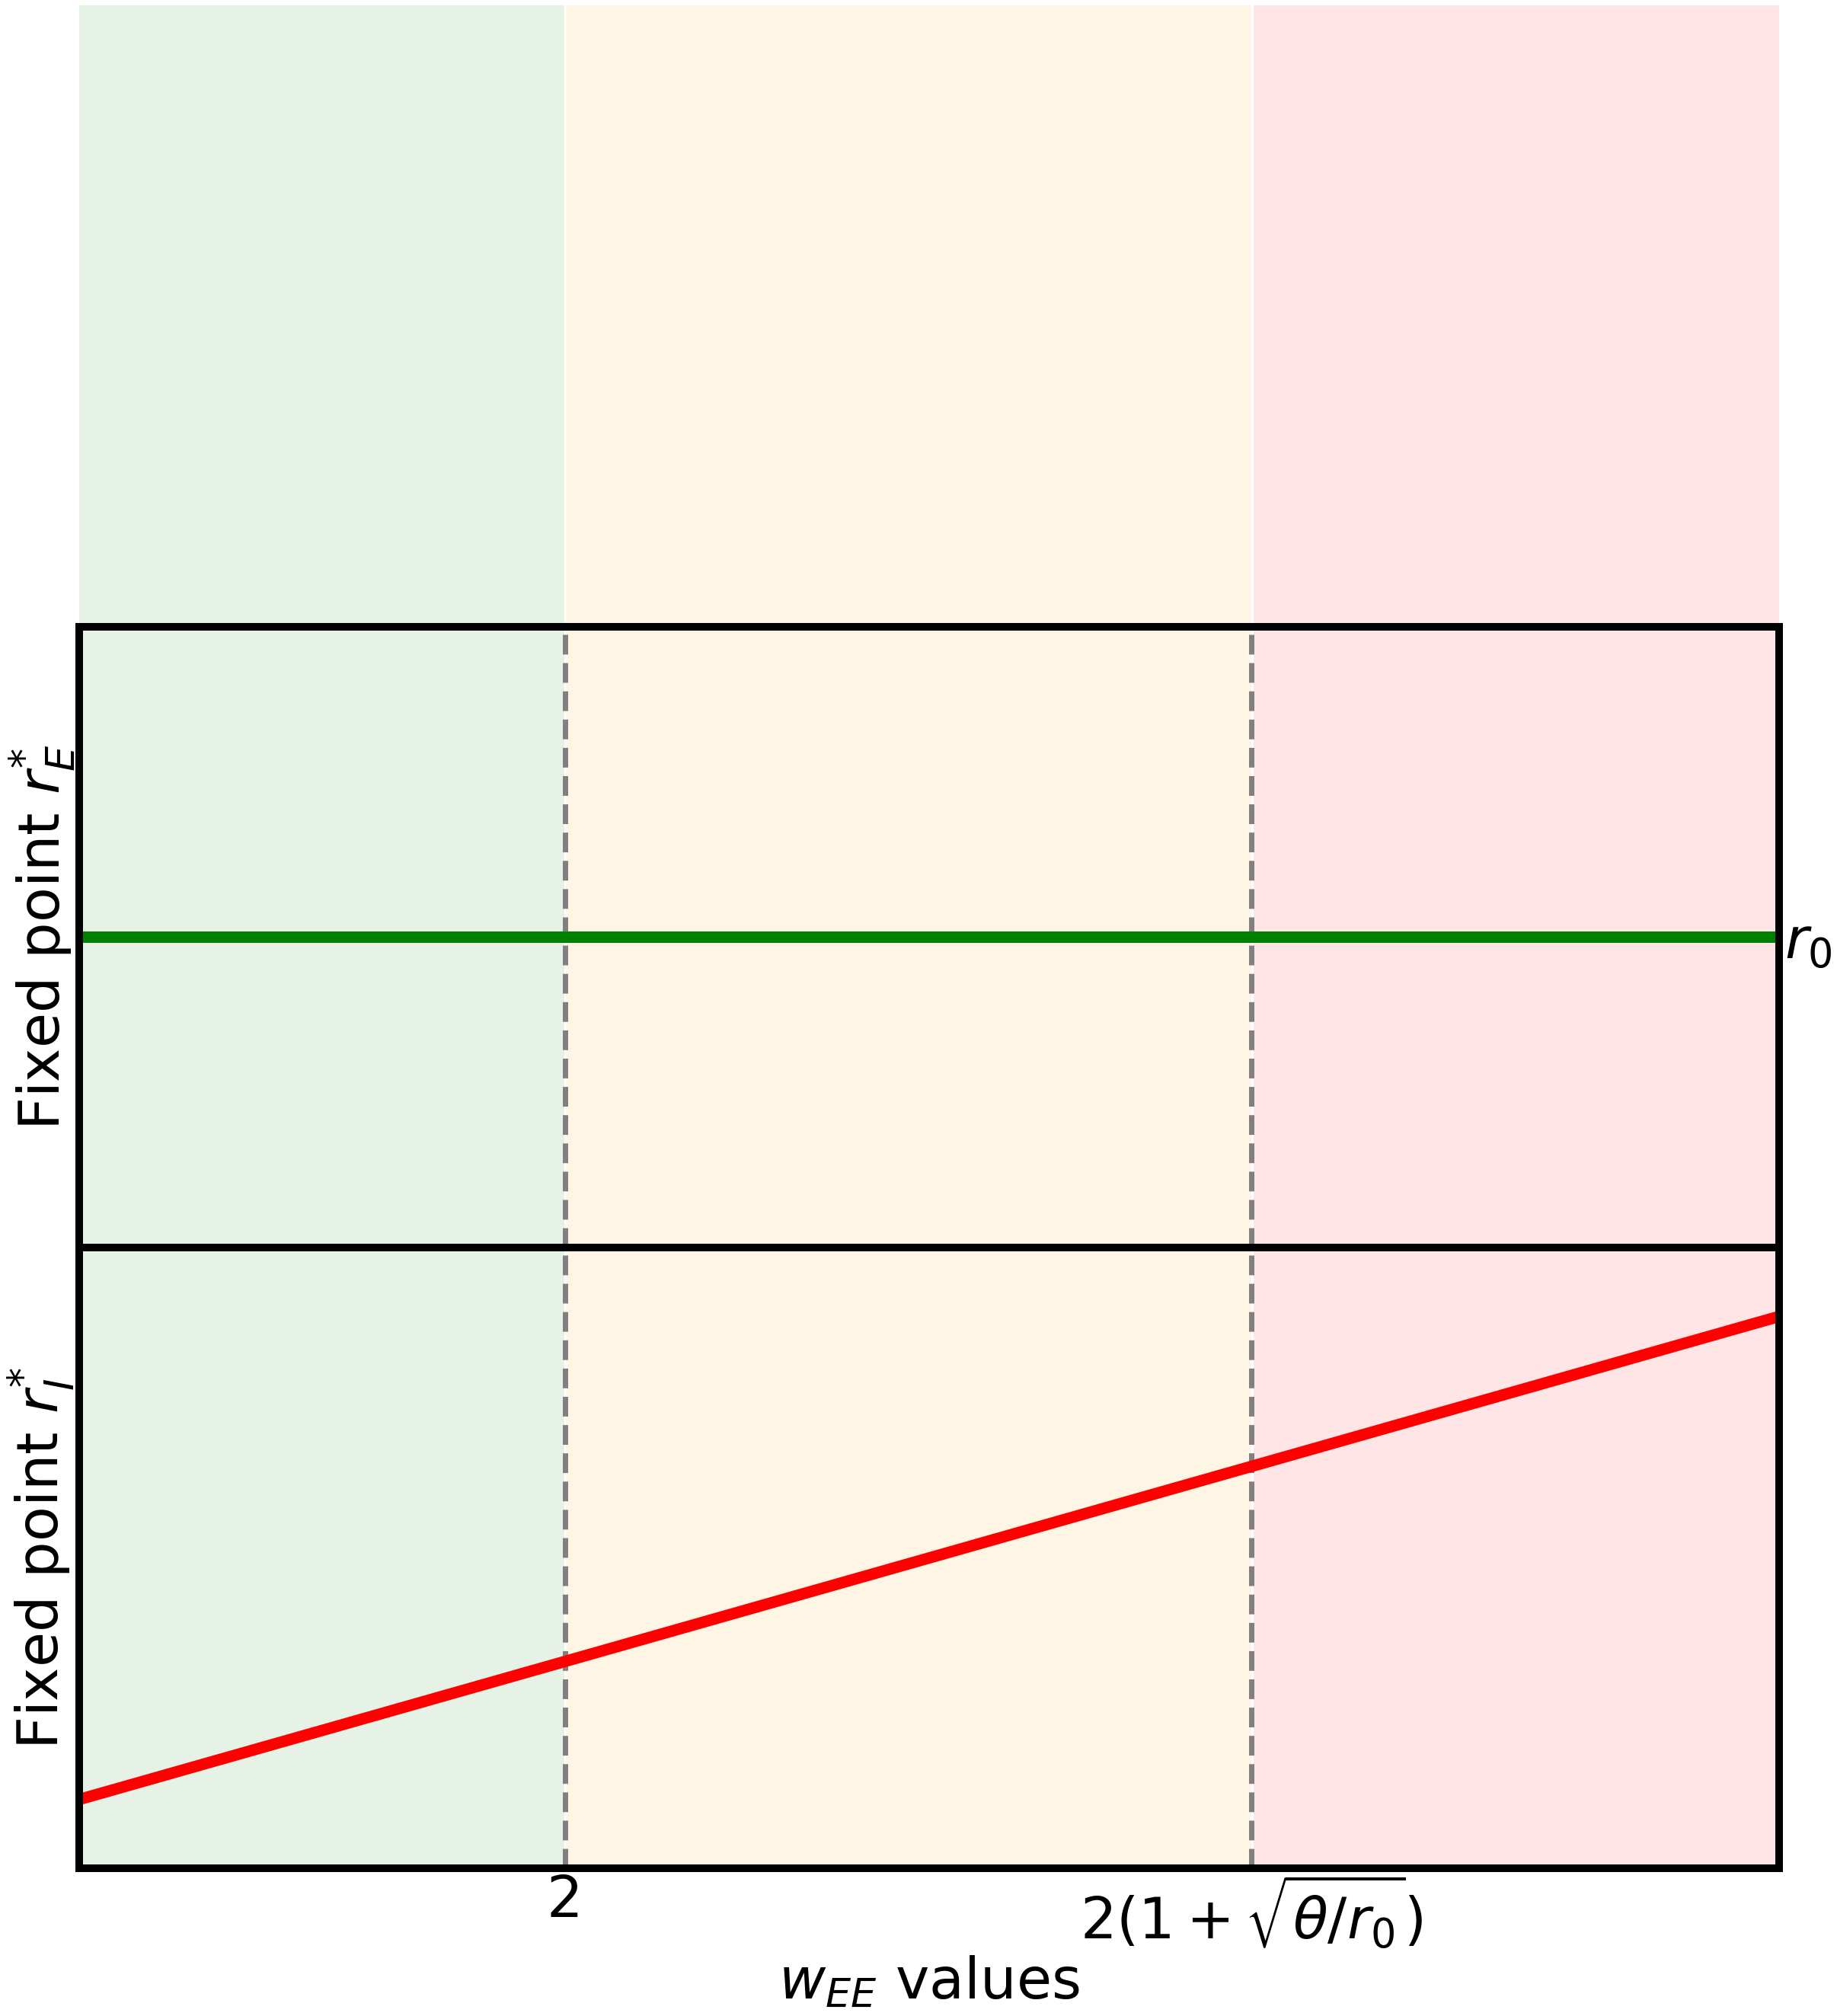

In [19]:
r0     = 10
theta  = 5
wEI    = 0.5


def get_rI_fix(wEE):
    return r0*(wEE-1) + theta



wEE = np.linspace(1,4.5,1000)


rE_fixed = r0*np.ones(wEE.shape)
rI_fixed = r0*(wEE-1) + theta



fsize = 75

plt.rcParams.update({'font.size': fsize})
plt.rcParams['axes.linewidth'] = 10

fig, axes = plt.subplots(3,1,figsize=(40,45))
fig.subplots_adjust(hspace=0)



axes[0].set_xticks([])
axes[0].set_ylim([0,1])
axes[0].axis("off")


axes[1].plot(wEE, rE_fixed, color = 'green', linewidth = 15)

plt.sca(axes[1])
plt.yticks([r0], [r'$r_0$'])
plt.xticks([ 2, 2*(1 + np.sqrt(float(theta)/float(r0)))], 
           [ '2' , r'$2(1 + \sqrt{\theta/r_0})$'])
axes[1].grid(linestyle = 'dashed', color='grey', linewidth = 7)
axes[1].grid(linestyle = 'dashed', color='grey', linewidth = 7)
#axes[0].set_ylim([h_0-0.5*h_0, h_0+0.5*h_0])
axes[1].set_ylabel(r'Fixed point $r_E^{*}$', fontsize = fsize)
axes[1].set_ylim([rE_fixed[0]-5, rE_fixed[-1] + 5])
axes[1].yaxis.tick_right()




axes[2].plot(wEE, rI_fixed, color = 'red', linewidth = 15)

rI_cross0 = get_rI_fix(0)
rI_cross1 = get_rI_fix( 2*(1-np.sqrt(float(theta)/r0)))
rI_cross2 = get_rI_fix( 2 )
rI_cross3 = get_rI_fix( 2*(1+np.sqrt(float(theta)/r0)))

plt.sca(axes[2])

plt.yticks([])

plt.xticks([2, 2*(1 + np.sqrt(float(theta)/float(r0)))], 
           ['2' , r'$2(1 + \sqrt{\theta/r_0})$'])

axes[2].grid(linestyle = 'dashed', color='grey', linewidth = 7)
#axes[1].set_ylim([np.min(r_fixed), np.max(r_fixed)])
axes[2].set_ylabel(r'Fixed point $r_I^{*}$', fontsize = fsize)
axes[2].set_xlabel(r'$w_{EE}$ values', fontsize = fsize)

axes[2].set_ylim([rI_fixed[0]-5, rI_fixed[-1] + 5])


for i in range(3):
    axes[i].set_xlim(wEE[0], wEE[-1])

    y_lim = axes[i].get_ylim()
    axes[i].fill_between(wEE, y_lim[0], y_lim[1],
                         where=wEE <= 2,
                         facecolor='green', alpha=0.1)


    
    axes[i].fill_between(wEE, y_lim[0], y_lim[1],
                     where= np.logical_and( wEE <= 2*(1 + np.sqrt(float(theta)/float(r0))), wEE >= 2) ,
                     facecolor='orange', alpha=0.1)
    
    axes[i].fill_between(wEE, y_lim[0], y_lim[1],
                 where= wEE >= 2*(1 + np.sqrt(float(theta)/float(r0))),
                 facecolor='red', alpha=0.1)
    
    
plt.savefig(FIGURES_DIR + 'Two_population_model_simulation/two_populations_stability.png')

# Simulation of two population model during a wake phase

In [7]:
def twoPopulationsModelWakePhase(X, t, params):
    
    tau, tauEE, tauIE, r0, theta, wEI, distortions = params
    [rE], [rI], [wEE], [wIE] = X
    
    ### Add small distortions as an input to the rE neuronal population to validate the stability ###
    drEdt = (1./tau)* ( - rE + np.clip( wEE*rE - wEI*rI + theta + distortions[t], 0, None  ) )
    
    drIdt = (1./tau)* ( - rI + np.clip( wIE*rE, 0, None ) )
    
    dwEEdt = (1./tauEE)*(rE * rE)
    dwIEdt = (1./tauIE)*(rI * rE *( rE - r0) )
    

    return [drEdt, drIdt, dwEEdt, dwIEdt]

######## Euler method parameters #########
time_step = 0.0001 
max_time = 6
time = np.arange(0, max_time, time_step)



############## parameters ################
tau = 0.01
tauEE = 1000
tauIE = 1000

r0   = 10
theta = 10
wEI  = 0.5



########## Initial conditions ############
wEE_0 = 1.5
wIE_0 = theta/(wEI*r0) + (wEE_0 - 1)/wEI

rE_0 = r0
rI_0 = wIE_0*rE_0


distortions = np.random.uniform(-0.1, 0.1, len(time))
############ simulation ###########3
X0 = [np.array([rE_0]), np.array([rI_0]), np.array([wEE_0]), np.array([wIE_0])]

params = [tau, tauEE, tauIE, r0, theta, wEI, distortions]
X, dXdt = odeint(twoPopulationsModelWakePhase, X0, time, params)
    

process: [####################] 100.0% 	 expected time  0 sec


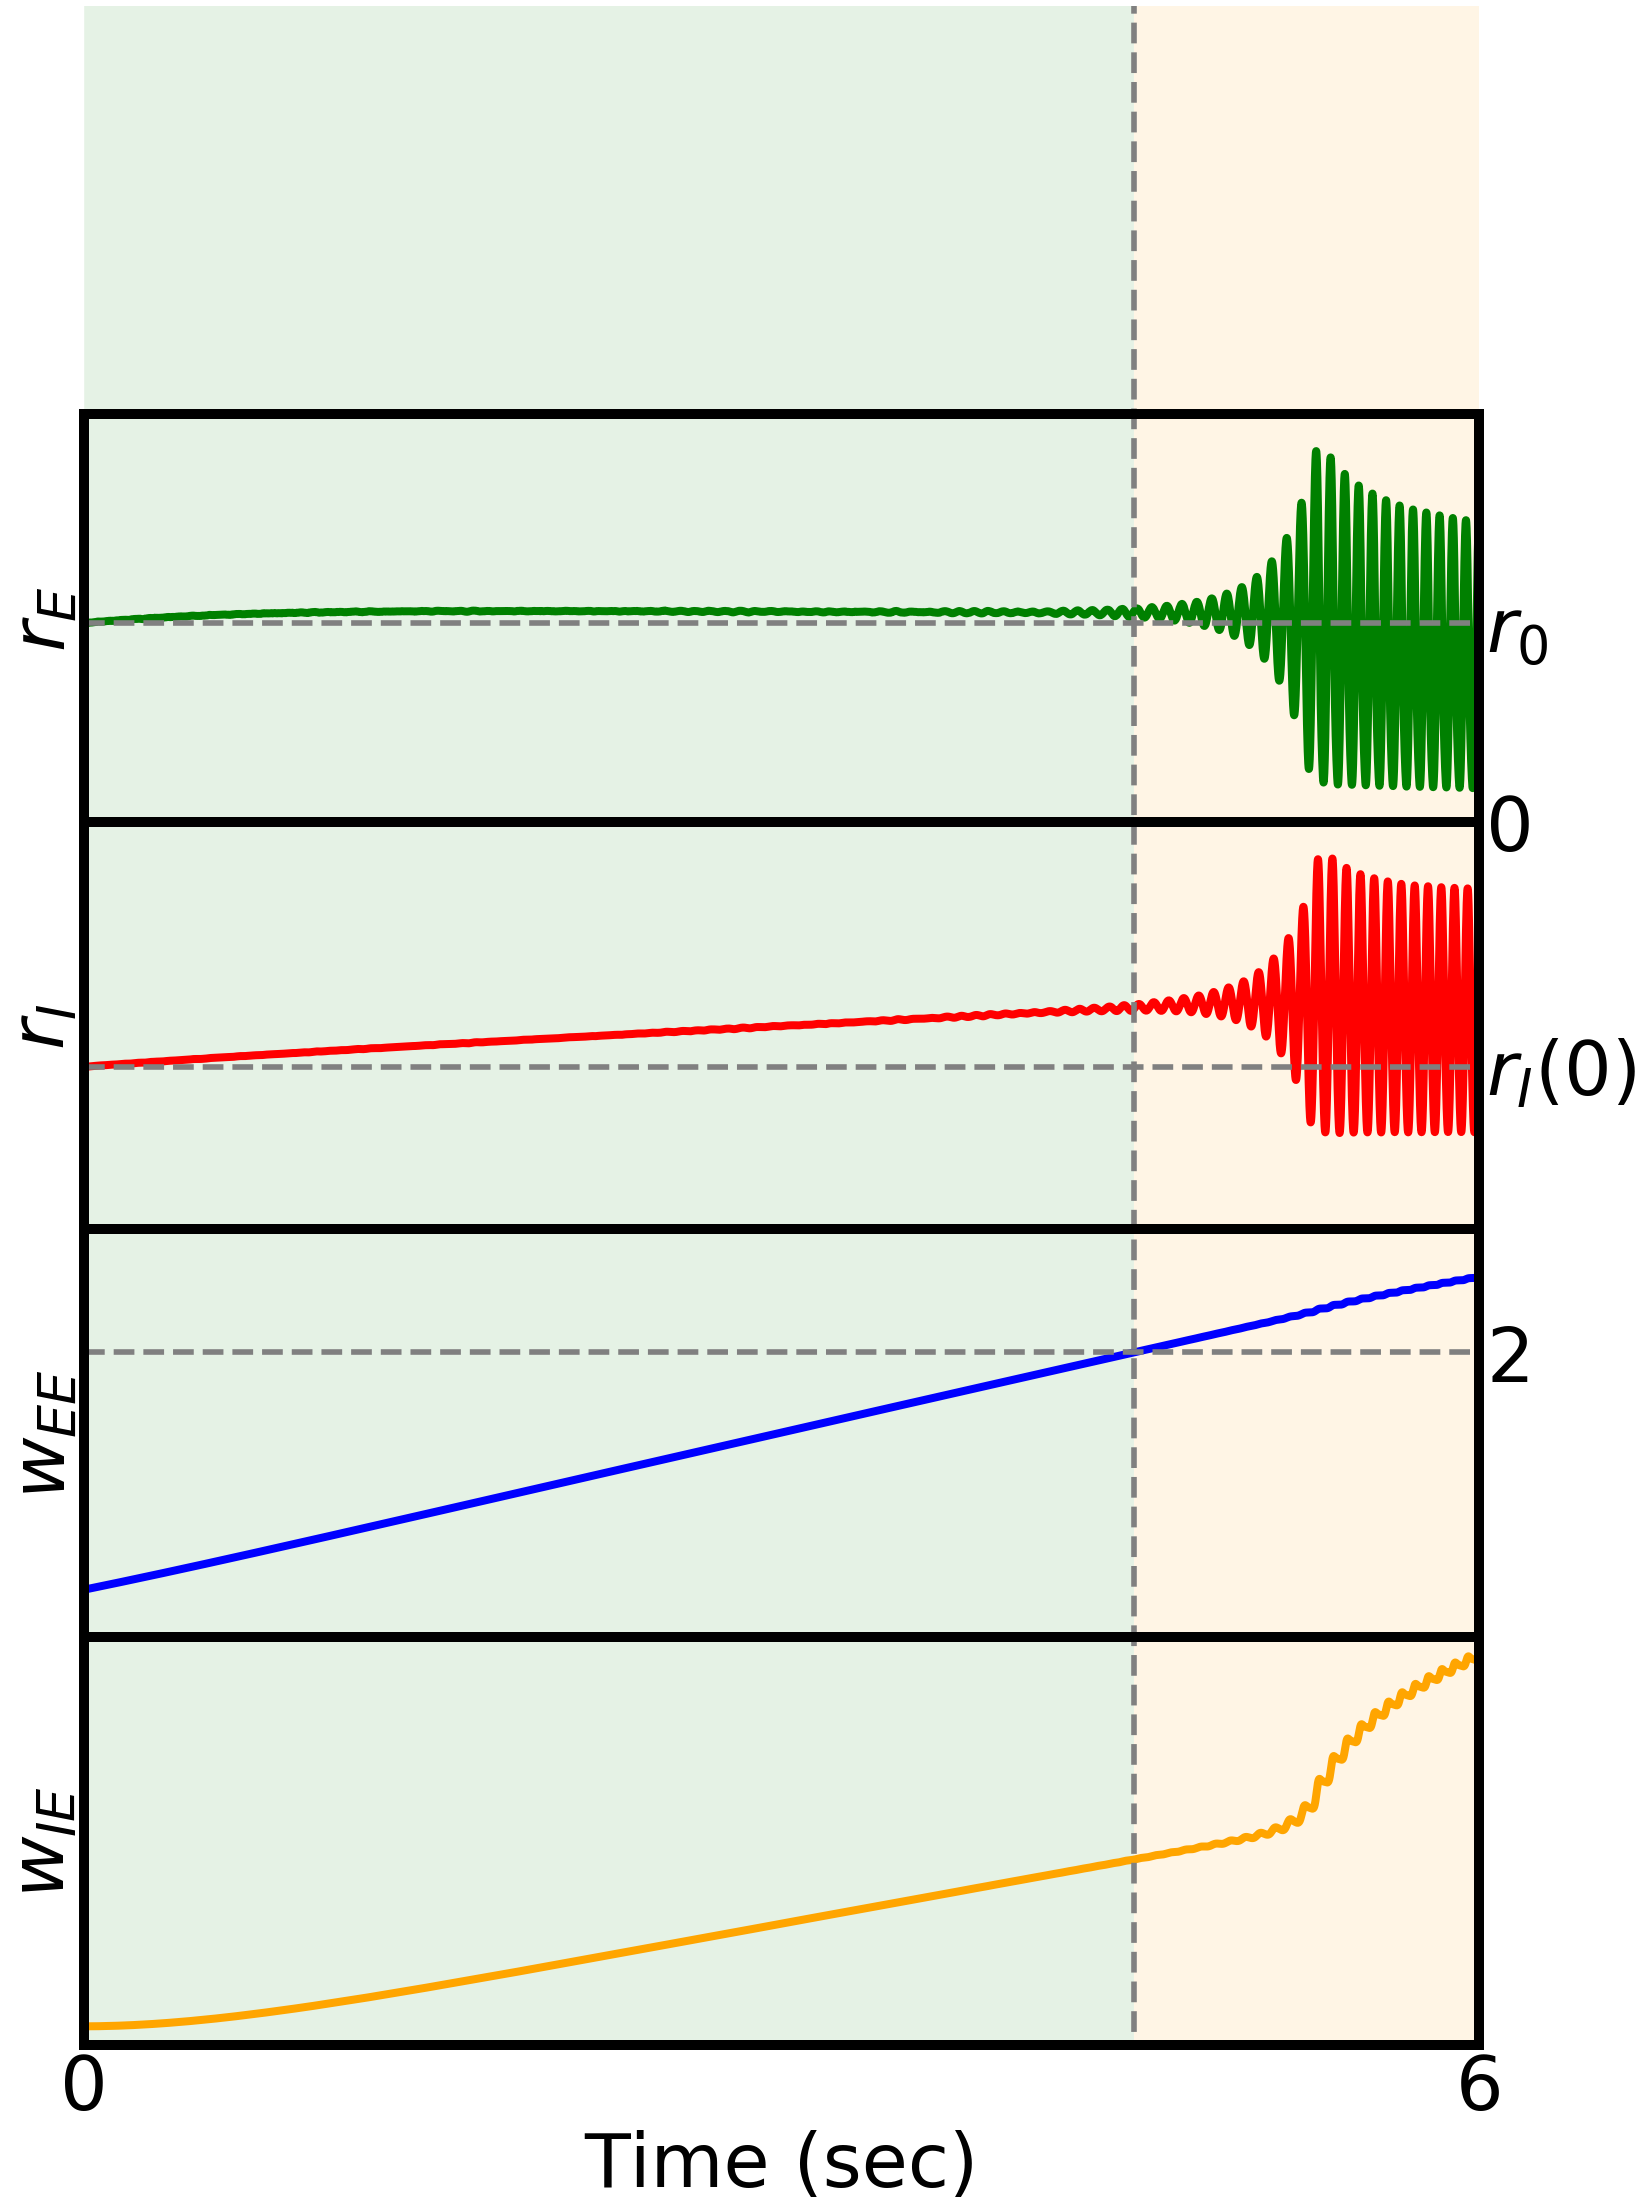

In [8]:
rE  = X[0][:,0]
rI  = X[1][:,0]
wEE = X[2][:,0]
wIE = X[3][:,0]



linewidth = 8

plt.rcParams.update({'font.size': 75})
plt.rcParams['axes.linewidth'] = 10
fig, axes = plt.subplots(5,1,figsize=(25,37.5))
fig.subplots_adjust(hspace=0, wspace= 0 )


axes[0].set_xticks([])
axes[0].set_ylim([0,1])
axes[0].axis("off")

axes[1].plot(time, rE, linewidth = linewidth, color = 'green', label="$r_E(t)$")
axes[1].set_ylim([0, 1.1*np.max(rE)])
axes[1].axhline(y=r0, xmin=0, xmax=time[-1], color ='grey', linestyle = "dashed", linewidth = 0.7*linewidth)
plt.sca(axes[1])
plt.yticks([0, r0], ['0', r'$r_0$'])
plt.xticks([])
axes[1].set_ylabel(r'$r_E$')

axes[2].plot(time, rI, linewidth = linewidth, color = 'red', label="$r_I(t)$")
axes[2].set_ylim([-0.5, 1.1*np.max(rI)])
plt.sca(axes[2])
plt.yticks([rI[0]], [r'$r_I(0)$'])
axes[2].axhline(y=rI[0], xmin=0, xmax=time[-1], color ='grey', linestyle = "dashed", linewidth = 0.7*linewidth)

plt.xticks([])
axes[2].set_ylabel(r'$r_I$')


axes[3].plot(time, wEE, linewidth = linewidth, color = 'blue', label="$w_{EE}(t)$")
axes[3].set_ylim([np.min(wEE) - 0.1, np.max(wEE) + 0.1])
axes[3].axhline(y=2, xmin=0, xmax=time[-1], color ='grey', linestyle = "dashed", linewidth = 0.7*linewidth)
plt.sca(axes[3])
plt.yticks([2])
plt.xticks([])
axes[3].set_ylabel(r'$w_{EE}$')

axes[4].plot(time, wIE, linewidth = linewidth, color = 'orange', label="$w_{IE}(t)$")
axes[4].set_ylim([np.min(wIE) - 0.1, np.max(wIE) + 0.1])
plt.sca(axes[4])
plt.yticks([])
axes[4].set_ylabel(r'$w_{IE}$')

ix = np.where(wEE >= 2)[0][0]
t_bifurcation = time[ix]

plt.xticks([])
plt.xlabel('Time (sec)')

for i in range(5):
    axes[i].yaxis.tick_right()

    axes[i].set_xlim(time[0], time[-1])
    ymin, ymax = axes[i].get_ylim()
    axes[i].axvline(x=t_bifurcation, ymin=-100, ymax=100, color ='grey', linestyle = "dashed", linewidth = 0.7*linewidth)

    plt.sca(axes[i])



    axes[i].fill_between(time, 0, 100,
                         where=time <= t_bifurcation,
                         facecolor='green', alpha=0.1)



    axes[i].fill_between(time, 0, 100,
                         where=time > t_bifurcation,
                         facecolor='orange', alpha=0.1)


axes[4].set_xticks([time[0], time[-1]])

plt.savefig(FIGURES_DIR + 'Two_population_model_simulation/bifurcation_example.png')





# Simulation of two population model during a wake and sleep phases

In [4]:
count_wake_phase = 0



####### Euler method parameters #########
time_step = 0.001 
max_time = 1000
time = np.arange(0, max_time, time_step)





def twoPopulationsModelSleep(X, t, params):
    global count_wake_phase 
    
    tau, tauEE, tauIE, r0, theta, wEI, sleep, rI_min, rI_max = params
    [rE], [rI], [wEE], [wIE], [R_filt] = X
    
    drEdt = (1./tau)* ( - rE + np.clip( wEE*rE - wEI*rI + theta, 0, None  ) )
    drIdt = (1./tau)* ( - rI + np.clip( wIE*rE, 0, None ) )
    
    dR_filt = (1./tau_filter) * (- R_filt + rI)
    
   
    if not sleep[t-1]:  # wake phase
        sleep[t] = 0
        dwEEdt = (1./tauEE)*(rE * rE)

        if time[t] > 1 and R_filt > rI_max[count_wake_phase]:  # switch to sleep phase
            phase = "sleep"
            sleep[t] = 1


    if sleep[t-1]:      # Sleep phase
        sleep[t] = 1
        dwEEdt = -(1./tauEE)*(rE * rE)
        if time[t] > 1 and R_filt < rI_min[count_wake_phase]:  # switch to wake phase
            phase = "wake"
            count_wake_phase += 1
            sleep[t] = 0
            
            
            
    dwIEdt = (1./tauIE)*(rI * rE *( rE - r0) )
    

    return [drEdt, drIdt, dwEEdt, dwIEdt, dR_filt]




######### parameters ###########
tau = 0.01
tau_EE = 10000
tau_IE = 10000
tau_filter = 2
r0    = 10
theta = 10
wEI   = 0.5

rI_min = [20]*100
rI_max = [35]*2 + [40] + [35]*100  # Different upper threshold after two full cycles to simulate sleep deprivation

sleep       = np.zeros(len(time))

params = [tau, tau_EE, tau_IE, r0, theta, wEI, sleep, rI_min, rI_max]



##### Initial conditions #######
wEE_0 = 1.1
wIE_0 = theta/(wEI*r0) + (wEE_0 - 1)/wEI

rE_0 = r0
rI_0 = wIE_0*rE_0

X0 = [np.array([rE_0]), np.array([rI_0]), np.array([wEE_0]), np.array([wIE_0]), np.array([rI_0])]





############ simulation ###########3

X, dXdt = odeint(twoPopulationsModelSleep, X0, time, params)


process: [####################] 100.0% 	 expected time  0 sec


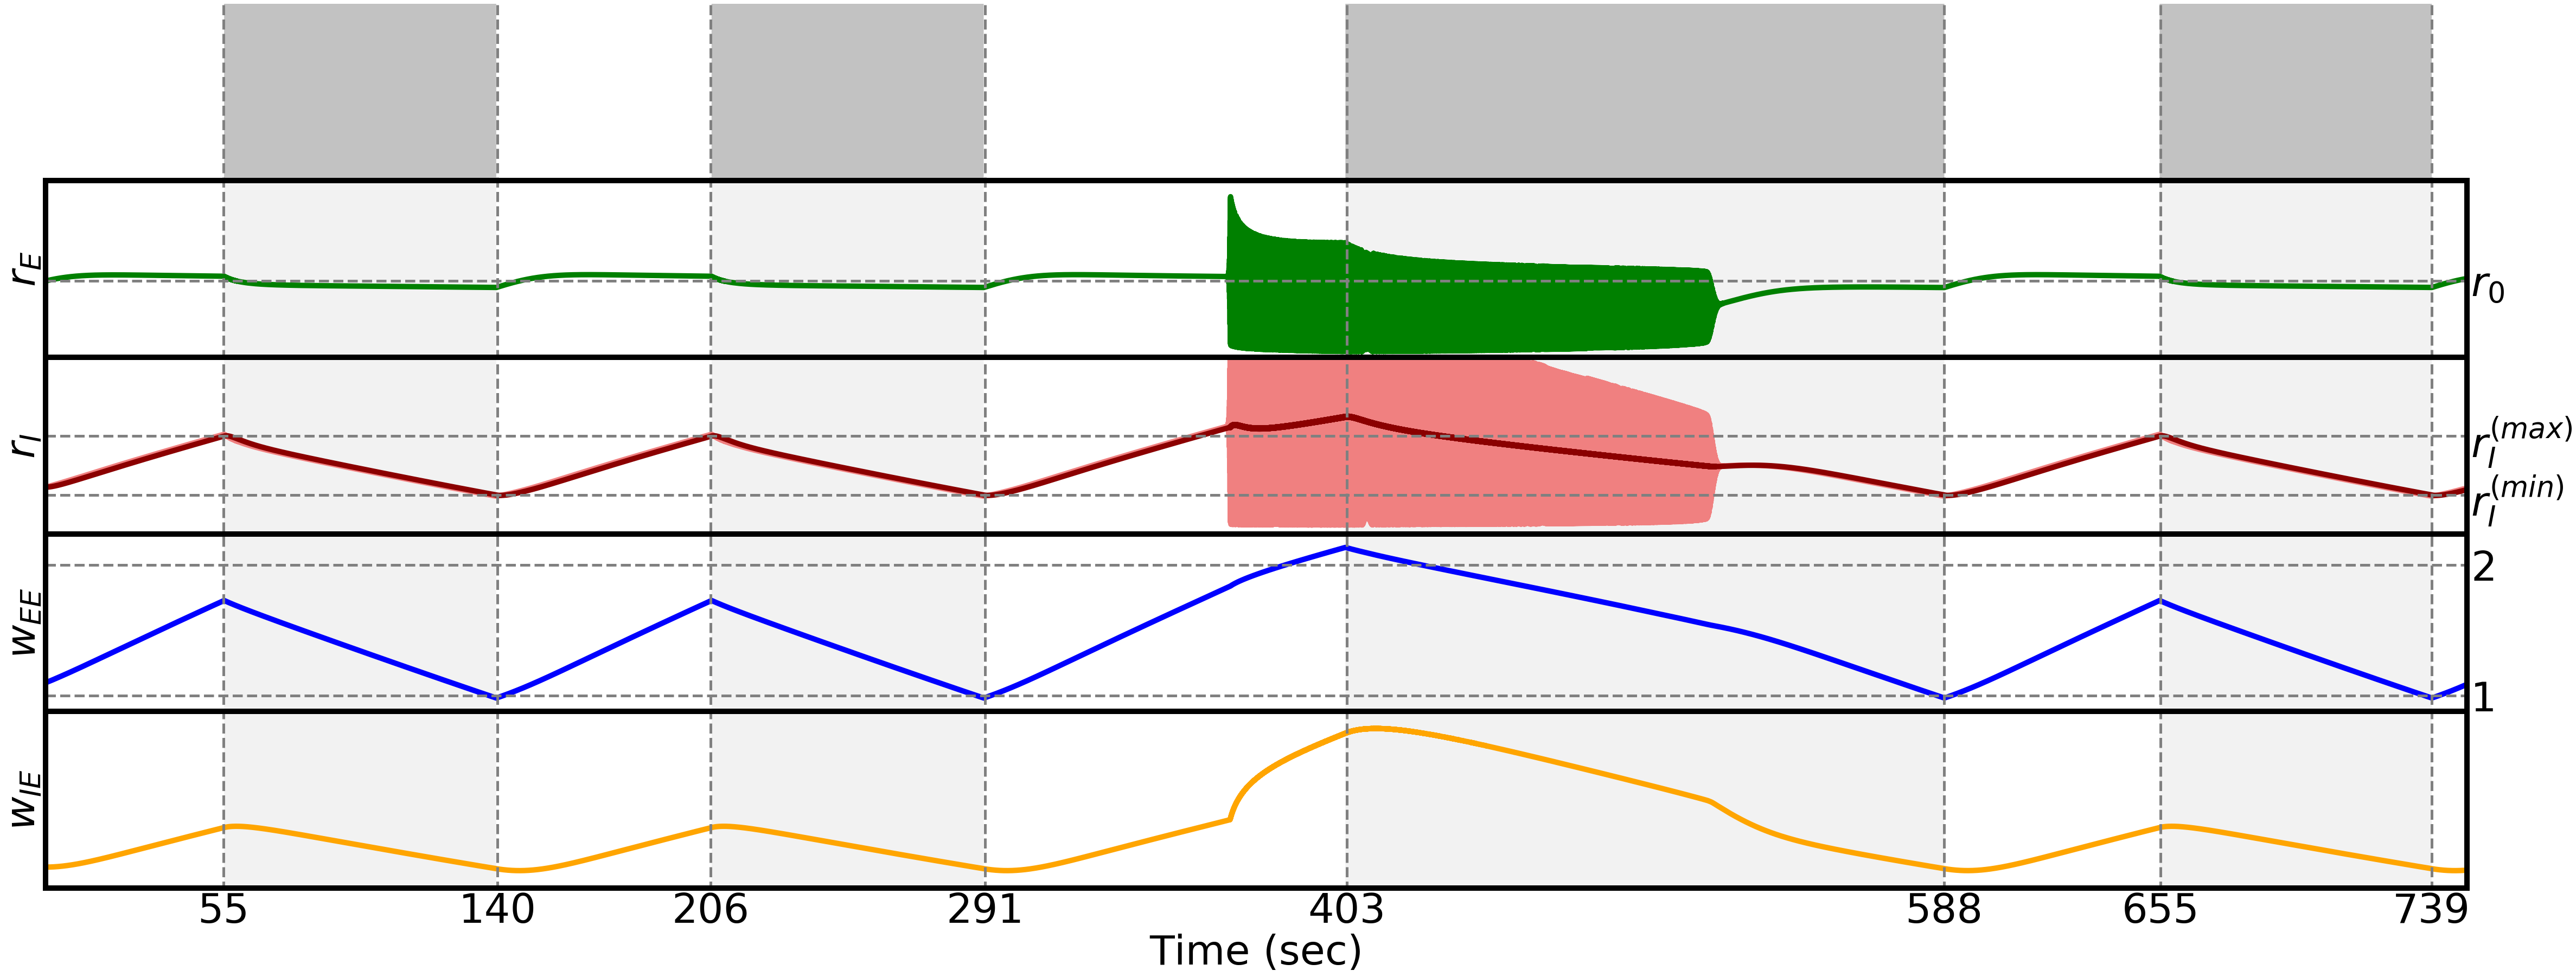

In [10]:
def plotSolutionSleepWake(time_tmp, X, params, min_time=0, max_time = -1, savename = None):
    
    if max_time == -1:
        max_time = time_tmp[-1]

    
    points = 100000
    min_ix = np.where(time_tmp > min_time)[0][0]
    max_ix = np.where(time_tmp < max_time)[0][-1]
    ix = np.linspace(min_ix, max_ix, points).astype(np.int)
    
    time   = time_tmp[ix]
    rE     = X[0][ix,0]
    rI     = X[1][ix,0]
    wEE    = X[2][ix,0]
    wIE    = X[3][ix,0]
    R_filt = X[4][ix,0]

    tau, tauEE, tauIE, r0, theta, wEI, sleep, rI_min, rI_max = params

    
    linewidth = 10
    
    plt.rcParams.update({'font.size': 75})
    plt.rcParams['axes.linewidth'] = 10
    fig, axes = plt.subplots(5,1,figsize=(80, 30))
    fig.subplots_adjust(hspace=0, wspace= 0 )
    
    
    axes[0].set_xticks([])
    axes[0].set_ylim([0,1])
    axes[0].axis("off")
    
    axes[0].fill_between(time, 0, 1000,
                         where=sleep[ix] ==1,
                         facecolor='black', alpha=0.2)
    
    
    axes[1].plot(time, rE, linewidth = linewidth, color = 'green', label="$r_E(t)$")
    axes[1].set_ylim([0, 1.1*np.max(rE)])
    axes[1].axhline(y=r0, xmin=0, xmax=time[-1], color ='grey', linestyle = "dashed", linewidth = 0.5*linewidth)
    plt.sca(axes[1])
    plt.yticks([r0], [r'$r_0$'])
    plt.xticks([])
    axes[1].set_ylabel(r'$r_E$')
    
    axes[2].plot(time, rI, linewidth = linewidth, color = 'lightcoral', label="$r_I(t)$")
    axes[2].plot(time, R_filt, linewidth = linewidth, color = 'darkred')

    axes[2].set_ylim([rI_min[0] - 10, rI_max[0] + 20])
    plt.sca(axes[2])
    plt.yticks([rI_min[0], rI_max[0]], [r'$r_I^{(min)}$', r'$r_I^{(max)}$'])
    axes[2].axhline(y=rI_min[0], xmin=0, xmax=time[-1], color ='grey', linestyle = "dashed", linewidth = 0.5*linewidth)
    axes[2].axhline(y=rI_max[0], xmin=0, xmax=time[-1], color ='grey', linestyle = "dashed", linewidth = 0.5*linewidth)
    plt.xticks([])
    axes[2].set_ylabel(r'$r_I$')

    
    axes[3].plot(time, wEE, linewidth = linewidth, color = 'blue', label="$w_{EE}(t)$")
    axes[3].set_ylim([np.min(wEE) - 0.1, np.max(wEE) + 0.1])
    axes[3].axhline(y=2, xmin=0, xmax=time[-1], color ='grey', linestyle = "dashed", linewidth = 0.5*linewidth)
    axes[3].axhline(y=1, xmin=0, xmax=time[-1], color ='grey', linestyle = "dashed", linewidth = 0.5*linewidth)
    axes[3].set_ylabel(r'$w_{EE}$')

    plt.sca(axes[3])
    plt.yticks([1,2])
    plt.xticks([])
    
    axes[4].plot(time, wIE, linewidth = linewidth, color = 'orange', label="$w_{IE}(t)$")
    axes[4].set_ylim([np.min(wIE) - 0.5, np.max(wIE) + 0.5])
    plt.sca(axes[4])
    plt.yticks([])
    axes[4].set_ylabel(r'$w_{IE}$')


    
    sleep_state = sleep[ix].astype(np.int32)
    sleep_switch = np.abs(sleep_state[1:] - sleep_state[:-1])
    
    ix_switch = np.where(sleep_switch == 1)
    time_ticks = np.round(time[ix_switch], 0)
    
    plt.xticks(time_ticks)
    plt.xlabel('Time (sec)')
    
    for i in range(5):
        axes[i].yaxis.tick_right()
        axes[i].set_xlim(time[0], time[-1])
        ymin, ymax = axes[i].get_ylim()
        plt.sca(axes[i])
            
        for tick in time_ticks:
            axes[i].axvline(x=tick, ymin=-100, ymax=100, color ='grey', linestyle = "dashed", linewidth = 0.5*linewidth)
        
        
        axes[i].fill_between(time, 0, 1000,
                             where=sleep[ix] ==1,
                             facecolor='black', alpha=0.05)
    


        
        



        
    if savename is not None:
        plt.savefig(FIGURES_DIR + '/Two_population_model_simulation/simulation_wake_sleep_two_population_model.png')
        




plotSolutionSleepWake(time, X, params, min_time = 0, max_time = 750, savename='simulation_sleep_phase')

## Slow-timescales limit

In this section, we analyze the conditions under which the synaptic rules in equations 

\begin{equation}\label{eq_two_population_plasticity_rules_wake_methods}
\text{Wake:}
\begin{cases}
    \tau_{EE} \dot{w}_{EE}(t) = r_E(t) r_E(t)\\
    \tau_{IE} \dot{w}_{IE}(t) = r_I(t)r_E(t)\Big(r_{E}(t) - r_0 \Big). \\
\end{cases}
\end{equation}

\begin{equation}\label{eq_two_population_plasticity_rules_sleep_methods}
\text{Sleep:}
\begin{cases}
    \tau_{EE} \dot{w}_{EE}(t) = -r_E(t) r_E(t)\\
    \tau_{IE} \dot{w}_{IE}(t) = r_I(t)r_E(t)\Big(r_{E}(t) - r_0 \Big). \\
\end{cases}
\end{equation}

stabilize the model. We therefore focus on the slow-timescale limit where the firing rates change sufficiently fast compared with the synaptic weights that these changes can be considered instantaneous ($\tau \longrightarrow 0$). We again first consider the linear range of the function $[\cdot]_+$ where the inputs to the neurons are positive. We approximate the instantaneous value of the firing rates as follows:

\begin{equation}
\begin{cases}
r_E = w_{EE}(t)r_{E} - w_{EI}r_I + \theta \\
r_I = w_{IE}(t)r_E
\end{cases}
\end{equation}

This linear system allows extracting the values of $r_E$ and $r_I$ in terms of the synaptic weights as:

\begin{equation}
\begin{cases}
r_E = \frac{\theta}{1-w_{EE} + w_{EI}w_{IE}}   \\
r_I = \frac{w_{IE}\theta}{1-w_{EE} + w_{EI}w_{IE}}
\end{cases}
\end{equation}


We can now compute the vector field for wedge and ring neuron activity as a consequence of the slow dynamics of synaptic plasticity:
by looking at how the two populations evolve over time due to the plasticity rules:

\begin{equation}\label{eq_two_populations_evolve_time_plasticity}
\begin{cases}
\dot{r_E} = \frac{\partial r_E}{\partial w_{EE}}\dot{w}_{EE} + \frac{\partial r_E}{\partial w_{IE}}\dot{w}_{IE} \\
\dot{r_I} = \frac{\partial r_I}{\partial w_{EE}}\dot{w}_{EE} + \frac{\partial r_I}{\partial w_{IE}}\dot{w}_{IE} \\
\end{cases}
\end{equation}


## 4.1 Slow-timescale limit in the wake phase

Considering the plasticity rules during the wake phase, the previous equation leads to the following system of differential equations:

\begin{equation}\label{eq:vectorfield_slow_timescales_wake}
(1)
\begin{cases}
\dot{r_E} = \frac{w_{EI}r_I\tau_{EE} - \tau_{IE}}{\tau_{EE}\tau_{IE}}\frac{r_E^3}{\theta} \Big( - r_E + \Big( 1 + \frac{\tau_{IE}}{w_{EI}r_I\tau_{EE} - \tau_{IE}} \Big) r_0 \Big)  \\
\dot{r_I} = \frac{r_I^3 r_E}{\theta}\Big(\frac{1}{\tau_{EE}} + \frac{1 - w_{EE}}{\tau_{IE}}(r_E - r_0) \Big)
\end{cases}
\end{equation}

The second equation gives the dynamics of ring neurons, which increase activity with $1/\tau_{EE}$. The first equation gives the dynamics of the population of wedge neurons approaching  a setpoint only when the effective decay time constant (the first factor in the right hand side) is positive, otherwise the equation diverges to infinity and the system is unstable. This gives the following criterion for $\tau_{EE}$ and $\tau_{IE}$:

\begin{equation}\label{eq:raw_criteria_slow-timescale}
    \frac{\tau_{EE}}{\tau_{IE}} > \frac{1}{w_{EI}r_I}
\end{equation}

This relationship supports the idea that plasticity in $w_{IE}$ has to be fast enough with respect to the LTP in $w_{EE}$; otherwise, if $w_{EE}$ increases faster than $w_{IE}$, the model diverges. Let us compute the upper limit of the previous inequality, which corresponds to the minimum of $r_I$. For that, we approximate the firing rate of wedge neurons by $r_E = r_0$, and $r_I = w_{IE}r_0$. Then, we can write $w_{IE}$ as a function of $w_{EE}$ as:

\begin{equation}\label{eq:w_EI_respect2_w_EE}
    w_{IE} = \frac{\theta}{w_{EI}r_0} + \frac{w_{EE} - 1}{w_{EI}}.
\end{equation}


The upper limit of the previous inequality will therefore be defined at the minimum of $w_{EE}$. As the minimum is $w_{EE} = 1$, the upper limit of the stability condition is:

\begin{equation}
    \frac{\tau_{EE}}{\tau_{IE}} > \frac{1}{\theta}.
\end{equation}

When this condition holds, the setpoint of wedge neurons in equation, which is not $r_0$ as approximated previously, is given by

\begin{equation}
    r_E^{*} = \Big( 1 + \frac{1}{w_{EI}r_I\frac{\tau_{EE}}{\tau_{IE}} - 1} \Big) r_0,
\end{equation}

which is generally different from $r_0$ due to the inertia of the dynamics of $w_{EE}$. In the limit $\tau_{EE} \longrightarrow \infty$  (no plasticity in $w_{EE}$), the fixed point is $r_0$, as expected from the fast-timescale analysis.

The following figure shows the vector field for the system of equations (1). The green line shows the trajectory of the setpoint in wedge neurons as the activity of ring neurons increase. As $r_I$ increases due to increasing $w_{EE}$, the setpoint in $r_E$ approaches $r_0$.



In [13]:
def normalize_vectors(qrE, qrI):

    norm = np.power(np.power(qrE, 2) + np.power(qrI, 2) ,0.5)
    factor = np.true_divide(norm - np.min(norm), np.max(norm) - np.min(norm))
    factor = np.clip(factor, 0.001, 0.001)
    qrI = np.true_divide(qrI, norm)
    qrE = np.true_divide(qrE, norm)

    qrE = np.multiply(qrE, factor)
    qrI = np.multiply(qrI, factor)
    
    return qrE, qrI

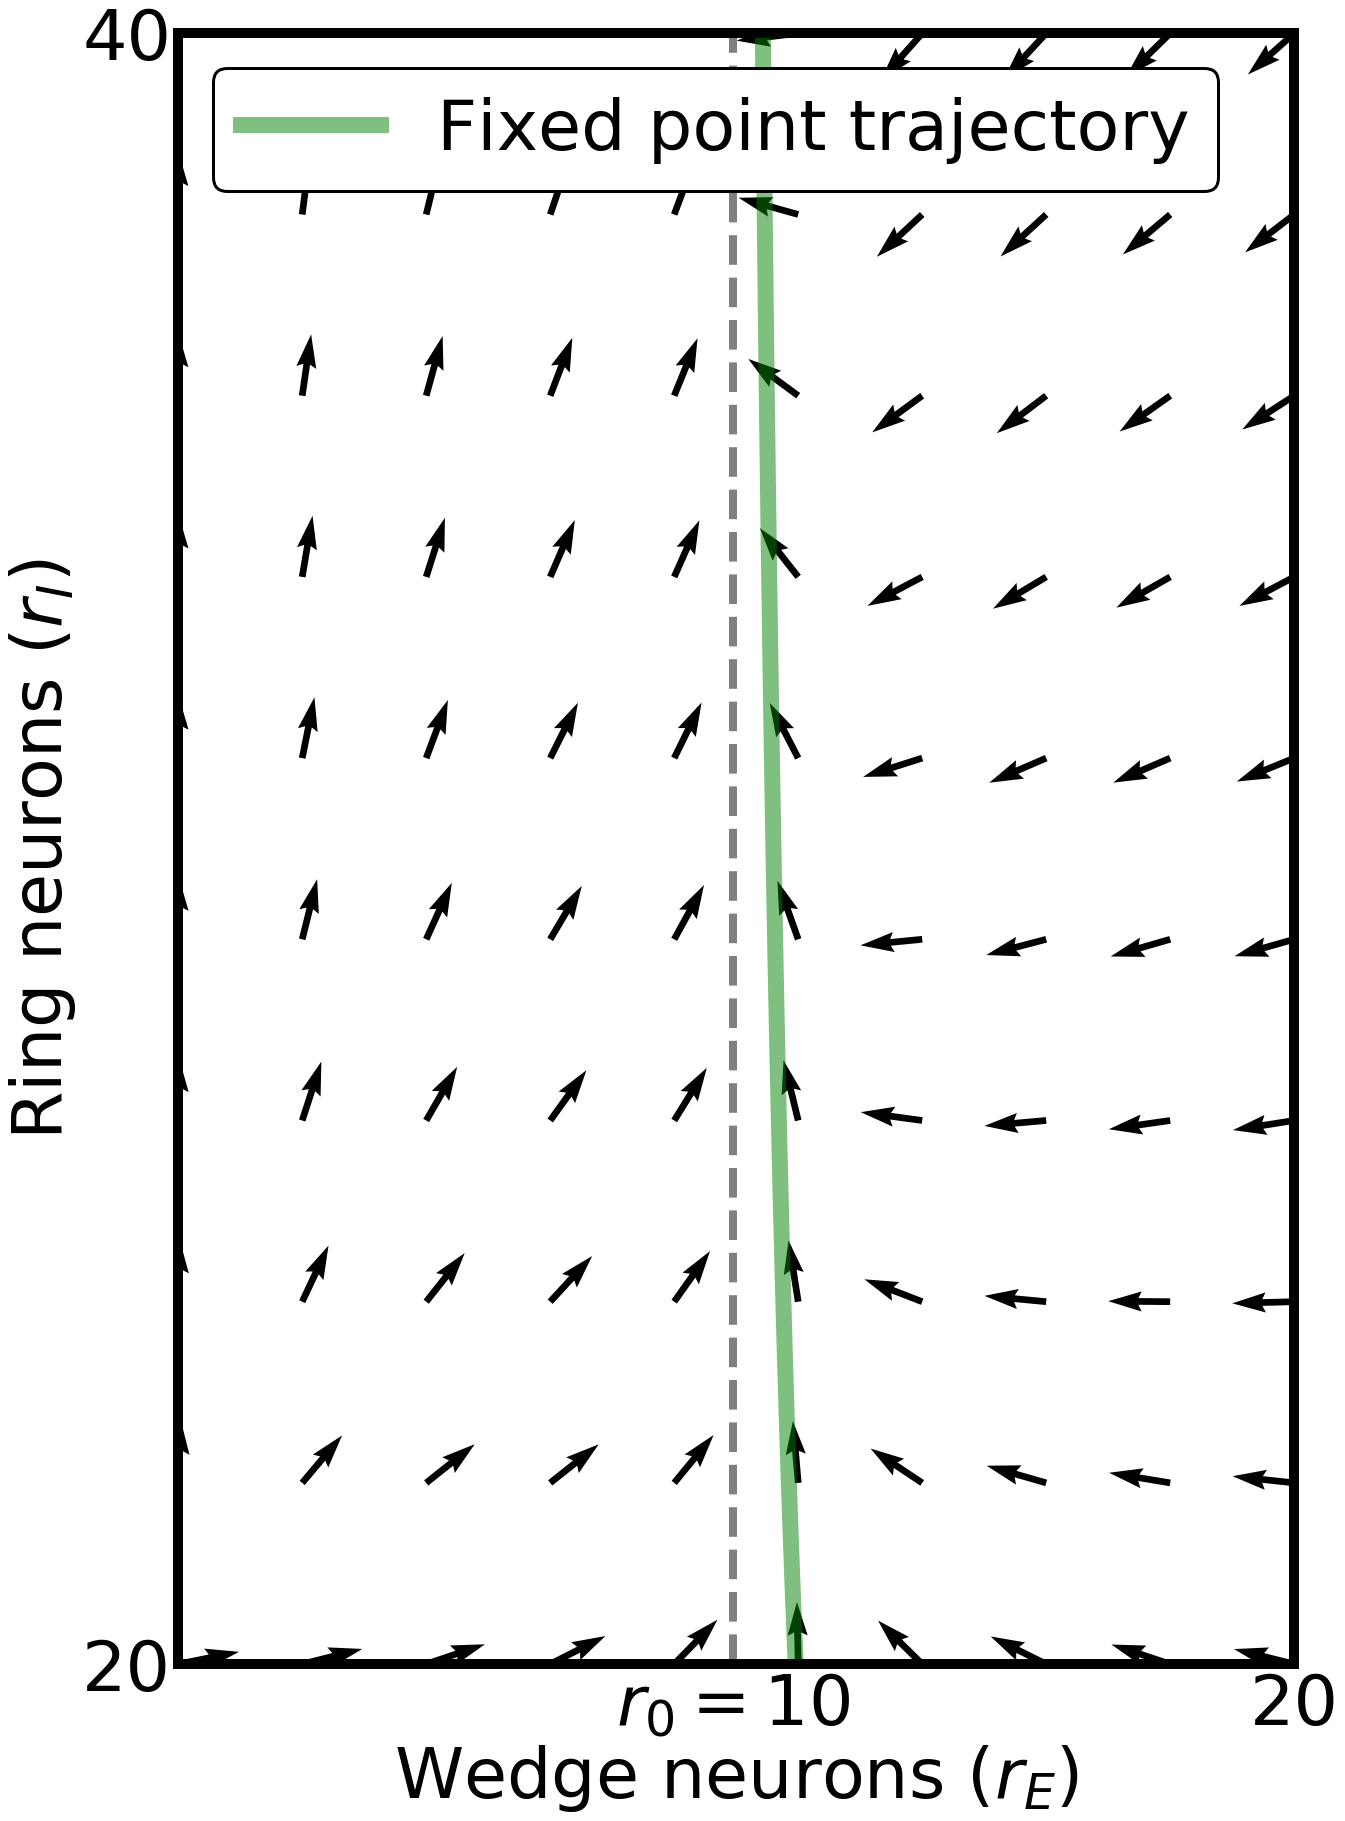

In [14]:
######## parameters #############
tau = 0.01
tauEE = 10000
tauIE = 10000

r0   = 10
theta = 10
wEI  = 0.5




min_rI = theta/wEI  # to set the condition that w_EE >= 1

rI_range = np.array([min_rI, 40])
rE_range = np.array([0.1,20])

rE_line = np.linspace(rE_range[0], rE_range[1], 10)
rI_line = np.linspace(rI_range[0], rI_range[1], 10)

rE, rI = np.meshgrid(rE_line, rI_line)

wIE = np.true_divide(rI,rE)
wEE = 1 - np.true_divide( theta - wEI*rI, rE)




factor1_rE = np.true_divide(np.power(rE, 3), theta)

sum1_rE = np.true_divide(rE, tauEE)
sum2_rE = np.true_divide(wEI*rI, tauIE)


drEdt =  np.multiply( factor1_rE, sum1_rE - np.multiply( sum2_rE, rE - r0) )



factor1_rI = np.true_divide(np.multiply(rI, np.power(rE,3)), theta)
sum1_rI = 1./tauEE
sum2_rE = np.true_divide(1 - wEE, tauIE  )



drIdt = np.multiply(factor1_rI, sum1_rI + np.multiply(sum2_rE, rE - r0)  )





qrE, qrI = normalize_vectors(drEdt, drIdt)


indexesCon = np.where(wIE >= np.true_divide(wEE - 1, wEI))

linewidth = 8

plt.rcParams.update({'font.size': 70})
plt.rcParams['axes.linewidth'] = 10


fig, axes = plt.subplots(figsize = (20,30))
axes.quiver(rE, rI, qrE, qrI)
axes.axvline(x=r0, ymin=0, ymax=2*np.max(rI), color ='grey', linestyle = "dashed", linewidth = linewidth)


rE_line = np.linspace(10, 70, 100)
rI_line = np.linspace(5, 80, 100)
fixed_rE = r0*(1 + np.true_divide(1, (wEI*rI_line*(tauEE/tauIE) - 1)) )





ix = np.where( fixed_rE <=  theta )
axes.plot(fixed_rE, rI_line, color = 'green', linewidth = 2*linewidth, alpha = 0.5, label="Fixed point trajectory")
l = plt.legend(loc="upper left")
l.get_frame().set_linewidth(3)
l.get_frame().set_edgecolor("black")
l.get_frame().set_alpha(1)

#axes.plot(rE_line, rE_line/wEI, color = 'grey', linewidth = linewidth)



axes.set_ylim(rI_range)
axes.set_xlim(rE_range)
plt.xticks([10,20], [r'$r_0 = 10$', '20'])
plt.yticks([20,40])
plt.xlabel('Wedge neurons $(r_E)$')
plt.ylabel('Ring neurons $(r_I)$')

plt.savefig(SUP_FIG_DIR + '/sup_fig2/vector_field_wake_phase.png')


## 4.2 Slow-timescale limit in the sleep phase

We can perform the same analysis during sleep by considering the plasticity rules during sleep, so that we end up with the following system of differential equations: 

\begin{equation}\label{eq:vectorfield_slow_timescales_sleep}
(2)
\begin{cases}
\dot{r_E} = \frac{w_{EI}r_I\tau_{EE} + \tau_{IE}}{\tau_{EE}\tau_{IE}}\frac{r_E^3}{\theta} \Big( - r_E + \Big( 1 - \frac{\tau_{IE}}{w_{EI}r_I\tau_{EE} + \tau_{IE}} \Big) r_0 \Big)  \\
\dot{r_I} = \frac{r_I^3 r_E}{\theta}\Big(-\frac{1}{\tau_{EE}} + \frac{1 - w_{EE}}{\tau_{IE}}(r_E - r_0) \Big). 
\end{cases}
\end{equation}

The second equation shows how ring neurons decrease their activity with $1/\tau_{EE}$, at the same rate as in the wake phase. The first equation shows a fixed point for wedge neurons that is lower than $r_0$, due to the inertia of a decreasing $w_{EE}$ during sleep, given by:

\begin{equation}
    r_E^{*} = \Big( 1 - \frac{1}{w_{EI}r_I\frac{\tau_{EE}}{\tau_{IE}} + 1} \Big) r_0.
\end{equation}

The following figure shows the vector field given by equation (2) during the sleep phase, where the trajectory of the setpoint of wedge neurons (the green line) diverges from $r_0$ as the activity of ring neurons decreases.

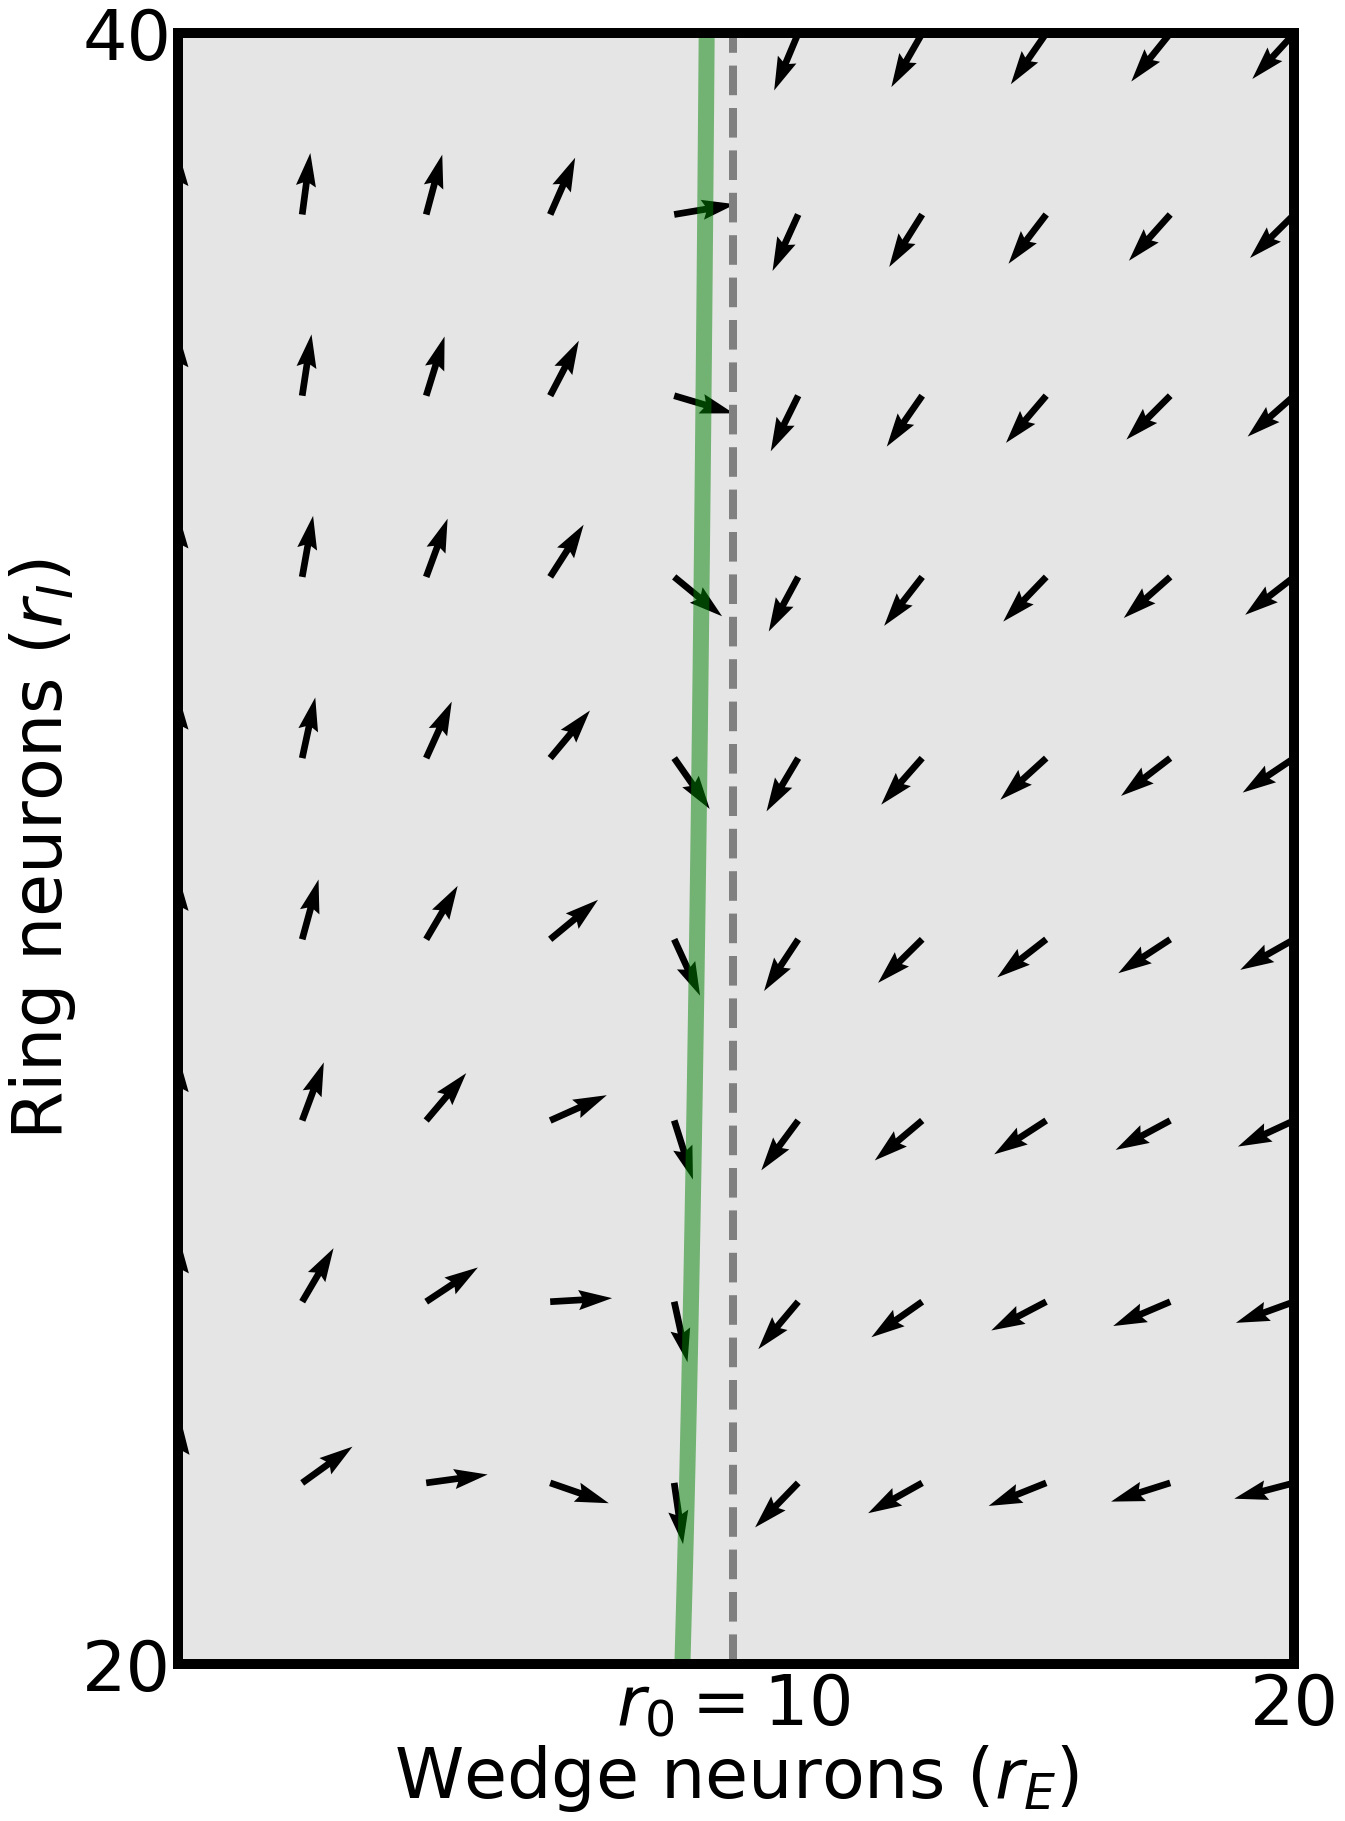

In [15]:
######## parameters #############
tau = 0.01
tauEE = -10000
tauIE = 10000

r0   = 10
theta = 10
wEI  = 0.5




min_rI = theta/wEI  # to set the condition that w_EE >= 1

rI_range = np.array([min_rI, 40])
rE_range = np.array([0.1,20])

rE_line = np.linspace(rE_range[0], rE_range[1], 10)
rI_line = np.linspace(rI_range[0], rI_range[1], 10)

rE, rI = np.meshgrid(rE_line, rI_line)

wIE = np.true_divide(rI,rE)
wEE = 1 - np.true_divide( theta - wEI*rI, rE)




factor1_rE = np.true_divide(np.power(rE, 3), theta)

sum1_rE = np.true_divide(rE, tauEE)
sum2_rE = np.true_divide(wEI*rI, tauIE)


drEdt =  np.multiply( factor1_rE, sum1_rE - np.multiply( sum2_rE, rE - r0) )



factor1_rI = np.true_divide(np.multiply(rI, np.power(rE,3)), theta)
sum1_rI = 1./tauEE
sum2_rE = np.true_divide(1 - wEE, tauIE  )



drIdt = np.multiply(factor1_rI, sum1_rI + np.multiply(sum2_rE, rE - r0)  )





qrE, qrI = normalize_vectors(drEdt, drIdt)


indexesCon = np.where(wIE >= np.true_divide(wEE - 1, wEI))

linewidth = 8

plt.rcParams.update({'font.size': 70})
plt.rcParams['axes.linewidth'] = 10


fig, axes = plt.subplots(figsize = (20,30))
axes.quiver(rE, rI, qrE, qrI)
axes.axvline(x=r0, ymin=0, ymax=2*np.max(rI), color ='grey', linestyle = "dashed", linewidth = linewidth)


rE_line = np.linspace(10, 70, 100)
rI_line = np.linspace(5, 80, 100)
fixed_rE = r0*(1 + np.true_divide(1, (wEI*rI_line*(tauEE/tauIE) - 1)) )





ix = np.where( fixed_rE <=  theta )
axes.plot(fixed_rE, rI_line, color = 'green', linewidth = 2*linewidth, alpha = 0.5, label="Fixed point trajectory")
#l = plt.legend(loc="upper left")
l.get_frame().set_linewidth(3)
l.get_frame().set_edgecolor("black")
l.get_frame().set_alpha(1)

#axes.plot(rE_line, rE_line/wEI, color = 'grey', linewidth = linewidth)



axes.set_ylim(rI_range)
axes.set_xlim(rE_range)
plt.xticks([10,20], [r'$r_0 = 10$', '20'])
plt.yticks([20,40])
plt.xlabel('Wedge neurons $(r_E)$')
plt.ylabel('Ring neurons $(r_I)$')

axes.fill_between(np.arange(0,100,1), 0, 100,
                     where=True,
                     facecolor='black', alpha=0.1)

plt.savefig(SUP_FIG_DIR + '/sup_fig2/vector_field_sleep_phase.png')
